In [1]:
import sys
import glob
import numpy as np
import pandas as pd
import xarray as xr 
from scipy import interpolate
import matplotlib.pyplot as plt 

sys.path.append('../../src/thermal/')

from open import dataset as open_dataset
import plotting as plotting
from plotting import enthalpy_pcolormesh


plt.rcParams['text.usetex']    = True

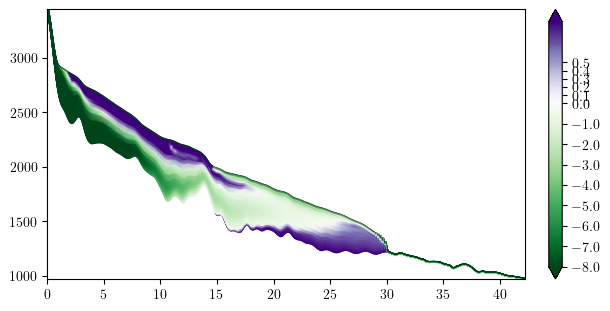

In [2]:
 
with xr.open_dataset('result/sprg/gridded/sprg_dx_100_NT_5000_dt_0.1_MB_0.5_OFF_Tma_-9.0_prog.nc') as src: 
    im = enthalpy_pcolormesh(src, -1, W_max=1.0)


In [12]:
np.abs(src.vel_x).max() * 0.1  / 100 

<xarray.DataArray 'vel_x' ()>
array(0.31905558)

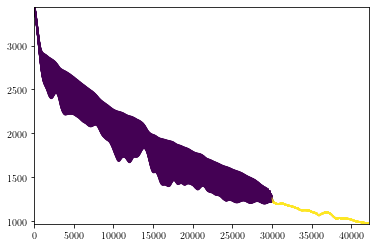

In [3]:
plt.pcolormesh(src.X[:,::-1], 
               src.Z.isel(t=-1), 
               ((src.depth + src.height) <= 11.0).isel(t=-1), 
               shading='gouraud')

In [4]:
ani = plotting.animate_enthalpy(src, i_0=9, i_s=50, interval=150); 
plt.close()

In [5]:
ani

In [6]:
ani.save('./figs/sprg/sprg_dx_100_NT_5000_dt_0.1_MB_0.5_OFF_Tma_-9.0_prog.mp4', dpi=400)

In [ ]:
plt.pcolormesh(src.X[:,::-1], 
               src.Z.isel(t=0), 
               src.pressure.isel(t=0), shading='gouraud')

In [ ]:
src.percent_temperate.plot()